In [1]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt

import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.gridspec import GridSpec
from matplotlib.patches import Polygon
from matplotlib.collections import PatchCollection

from pandas import DataFrame
%matplotlib inline

In [2]:
exp_name = "exp_017"

In [3]:
v_data = np.genfromtxt('experiments/' + exp_name + '_vel_.txt', delimiter=',')
s_data = np.genfromtxt('experiments/' + exp_name + '_state_.txt', delimiter=',')
f_data = np.genfromtxt('experiments/' + exp_name + '_features_.txt', delimiter=',')

In [4]:
t0 = v_data[0, 0] / 1e9 

In [5]:
v_data[:, 0] = v_data[:, 0] / 1e9
v_data[:, 0] = v_data[:, 0] - t0

s_data[:, 0] = s_data[:, 0] / 1e9
s_data[:, 0] = s_data[:, 0] - t0

f_data[:, 0] = f_data[:, 0] / 1e9
f_data[:, 0] = f_data[:, 0] - t0

In [6]:
tf = s_data[-1, 0]

In [7]:
b = np.zeros((v_data.shape[0]+1, v_data.shape[1]))
b[:-1, :] = v_data
b[-1, 0] = tf
v_data = b

b = np.zeros((f_data.shape[0]+1, f_data.shape[1]))
b[:-1, :] = f_data
b[-1, 0] = tf
f_data = b

In [8]:
plt.style.use('seaborn-deep')
plt.style.use('classic')
matplotlib.rcParams['axes.prop_cycle'] = matplotlib.cycler('color', ['#0072B2', '#009E73', '#D55E00', '#CC79A7', '#F0E442', '#56B4E9'])
matplotlib.rcParams['axes.linewidth'] = 1.3
matplotlib.rcParams['lines.linewidth'] = 1.3
matplotlib.rc('text', usetex=True)
matplotlib.rcParams['text.latex.preamble'] = [r"\usepackage{amsmath}"]
matplotlib.rcParams.update({'font.size': 8})

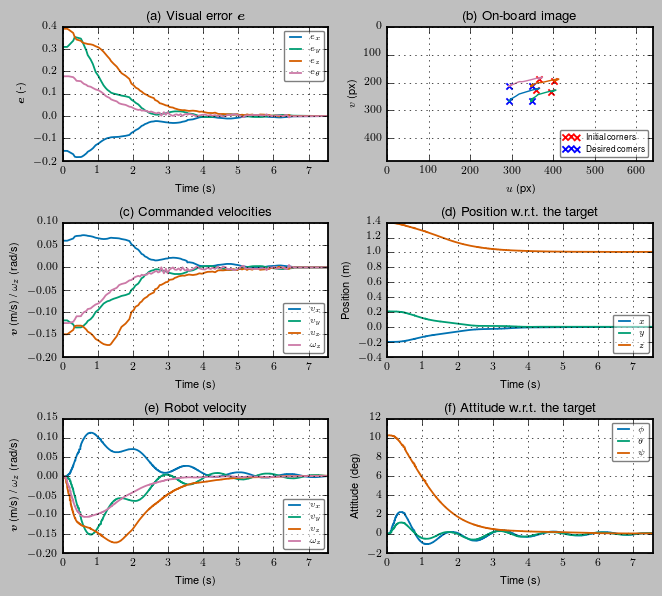

In [12]:
fig = plt.figure(figsize=plt.figaspect(0.9), dpi=100)

ax0 = fig.add_subplot(321)
ax1 = fig.add_subplot(322)
ax2 = fig.add_subplot(323)
ax3 = fig.add_subplot(324)
ax4 = fig.add_subplot(325)
ax5 = fig.add_subplot(326)

# Subplot 0

ax0.plot(f_data[:, 0], f_data[:, 12], label=r'$e_{x}$')
ax0.plot(f_data[:, 0], f_data[:, 11], label=r'$e_{y}$')
ax0.plot(f_data[:, 0], f_data[:, 13], label=r'$e_{z}$')
ax0.plot(f_data[:, 0], f_data[:, 14], label=r'$e_{\theta}$')

ax0.set_xlim(0, tf)

ax0.set_xlabel(r'Time (s)')
ax0.set_ylabel(r'$\boldsymbol{e}$ (-)')

ax0.set_title(r'(a) Visual error $\boldsymbol{e}$')

leg0 = ax0.legend(fancybox=True, prop={'size': 6}, loc='upper right')
leg0.get_frame().set_alpha(0.5)

# Subplot 1

ax1.plot(f_data[:-1, 1], f_data[:-1, 2], lw='1')
ax1.plot(f_data[:-1, 3], f_data[:-1, 4], lw='1')
ax1.plot(f_data[:-1, 5], f_data[:-1, 6], lw='1')
ax1.plot(f_data[:-1, 7], f_data[:-1, 8], lw='1')
#ax1.plot(f_data[:, 9], f_data[:, 10], lw='1')

pol_x = [f_data[-2, 1], f_data[-2, 3], f_data[-2, 5], f_data[-2, 7]]
pol_y = [f_data[-2, 2], f_data[-2, 4], f_data[-2, 6], f_data[-2, 8]]

i_pol_x = [f_data[0, 1], f_data[0, 3], f_data[0, 5], f_data[0, 7]]
i_pol_y = [f_data[0, 2], f_data[0, 4], f_data[0, 6], f_data[0, 8]]

ax1.scatter(i_pol_x, i_pol_y, marker='x', s=20, color='r', label='Initial corners')
ax1.scatter(pol_x, pol_y, marker='x', s=20, color='b', label='Desired corners')

ax1.set_xlim(0, f_data[0, -1])
ax1.set_ylim(0, f_data[0, -2])

ax1.invert_yaxis()

ax1.set_xlabel(r'$u$ (px)')
ax1.set_ylabel(r'$v$ (px)')

ax1.set_title(r'(b) On-board image')

leg1 = ax1.legend(fancybox=True, prop={'size': 6}, loc='lower right')
leg1.get_frame().set_alpha(0.5)

# Subplot 2

ax2.plot(v_data[:, 0], v_data[:, 1], label=r'$v_{x}$')
ax2.plot(v_data[:, 0], v_data[:, 2], label=r'$v_{y}$')
ax2.plot(v_data[:, 0], v_data[:, 3], label=r'$v_{z}$')
ax2.plot(v_data[:, 0], v_data[:, 6], label=r'$\omega_{z}$')

ax2.set_xlim(0, tf)

ax2.set_xlabel(r'Time (s)')
ax2.set_ylabel(r'$\boldsymbol{v}$ (m/s) / $\omega_z$ (rad/s)')

ax2.set_title(r'(c) Commanded velocities')

leg2 = ax2.legend(fancybox=True, prop={'size': 6}, loc='lower right')
leg2.get_frame().set_alpha(0.5)

# Subplot 3

ax3.plot(s_data[:, 0], s_data[:, 1] + 0.4, label=r'$x$')
ax3.plot(s_data[:, 0], s_data[:, 2], label=r'$y$')
ax3.plot(s_data[:, 0], s_data[:, 3], label=r'$z$')

ax3.set_xlim(0, tf)

ax3.set_xlabel(r'Time (s)')
ax3.set_ylabel(r'Position (m)')

ax3.set_title(r'(d) Position w.r.t. the target')

leg3 = ax3.legend(fancybox=True, prop={'size': 6}, loc='lower right')
leg3.get_frame().set_alpha(0.5)

# Subplot 4

ax4.plot(s_data[:, 0], s_data[:, 7], label=r'$v_{x}$')
ax4.plot(s_data[:, 0], s_data[:, 8], label=r'$v_{y}$')
ax4.plot(s_data[:, 0], s_data[:, 9], label=r'$v_{z}$')
ax4.plot(s_data[:, 0], s_data[:, 12], label=r'$\omega_{z}$')

ax4.set_xlim(0, tf)

ax4.set_xlabel(r'Time (s)')
ax4.set_ylabel(r'$\boldsymbol{v}$ (m/s) / $\omega_z$ (rad/s)')

ax4.set_title(r'(e) Robot velocity')

leg4 = ax4.legend(fancybox=True, prop={'size': 6}, loc='lower right')
leg4.get_frame().set_alpha(0.5)

# Subplot 5

ax5.plot(s_data[:, 0], np.rad2deg(s_data[:, 4]), label=r'$\phi$')
ax5.plot(s_data[:, 0], np.rad2deg(s_data[:, 5]), label=r'$\theta$')
ax5.plot(s_data[:, 0], np.rad2deg(s_data[:, 6]), label=r'$\psi$')

ax5.set_xlim(0, tf)

ax5.set_xlabel(r'Time (s)')
ax5.set_ylabel(r'Attitude (deg)')

ax5.set_title(r'(f) Attitude w.r.t. the target')

leg5 = ax5.legend(fancybox=True, prop={'size': 6}, loc='upper right')
leg5.get_frame().set_alpha(0.5)

ax0. grid(True)
ax1. grid(True)
ax2. grid(True)
ax3. grid(True)
ax4. grid(True)
ax5. grid(True)

fig.tight_layout()

fig.savefig(exp_name + '_plot.pdf')